In [105]:
import pandas as pd
import numpy as np
import requests
import re
import urllib.parse
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import time
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import pandas.plotting as pd_plotting

In [2]:
boardGames = pd.read_csv("boardgamesData.csv")

In [94]:
boardGames["GroupSize"] = pd.Categorical(boardGames["GroupSize"], categories = ["Individual", "Small", "Large", "Massive"], ordered = True)
boardGames["Time Category"] = pd.Categorical(boardGames["Time Category"], categories = ["Quick", "Short", "Moderate", "Long", "Very Long", "Marathon"], ordered = True)
boardGames["AgeRating"] = pd.Categorical(boardGames["AgeRating"], categories = ["Young", "PreTeen", "Teen", "Adult", "Any"], ordered = True)



C:\Users\brade\AppData\Local\Temp\ipykernel_7104\803506196.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  pd_plotting.scatter_matrix(boardGames, ax = ax)


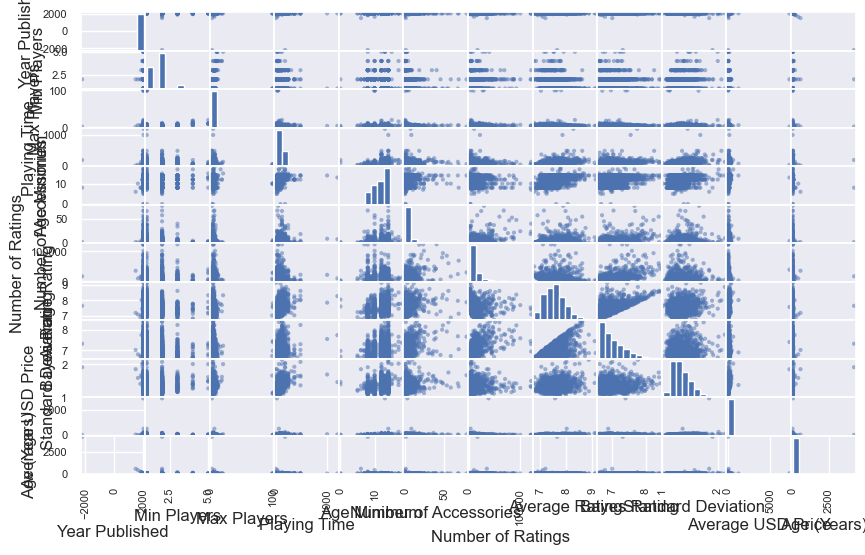

In [108]:
fig, ax = plt.subplots(figsize=(10, 6))
pd_plotting.scatter_matrix(boardGames, ax = ax)
plt.show()

In [3]:
boardGames

,Title,Year Published,Min Players,Max Players,Playing Time,Age Minimum,Number of Accessories,Number of Ratings,Average Rating,Bayes Rating,Standard Deviation,Average USD Price,Age (Years),Time Category,AgeRating,GroupSize
0,Brass: Birmingham,2018,2,4,120,14,15,41589,8.60841,8.42243,1.41849,144.334286,5,Long,Teen,Small
1,Pandemic Legacy: Season 1,2015,2,4,60,13,1,51789,8.53305,8.38673,1.60207,54.641786,8,Short,Teen,Small
2,Gloomhaven,2017,1,4,120,14,55,60064,8.60914,8.37477,1.74605,127.098214,6,Long,Teen,Small
3,Ark Nova,2021,1,4,150,14,13,36307,8.53318,8.31867,1.37819,63.212143,2,Long,Teen,Small
4,Twilight Imperium: Fourth Edition,2017,3,6,480,14,18,21980,8.61092,8.24098,1.61959,131.515517,6,Marathon,Teen,Large
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Ascension: Storm of Souls,2011,1,4,30,13,3,3602,7.27642,6.60765,1.31682,NaN,12,Quick,Teen,Small
996,5-Minute Dungeon,2017,2,5,30,8,0,9422,6.93598,6.60714,1.35988,55.500000,6,Quick,Young,Large
997,Hawaii,2011,2,5,60,13,0,4491,7.11247,6.60619,1.28626,57.040000,12,Short,Teen,Large
998,Legacy: The Testament of Duke de Crecy,2013,1,4,60,8,2,4317,7.13235,6.60564,1.24950,38.037692,10,Short,Young,Small


<Axes: xlabel='Average USD Price', ylabel='Number of Ratings'>

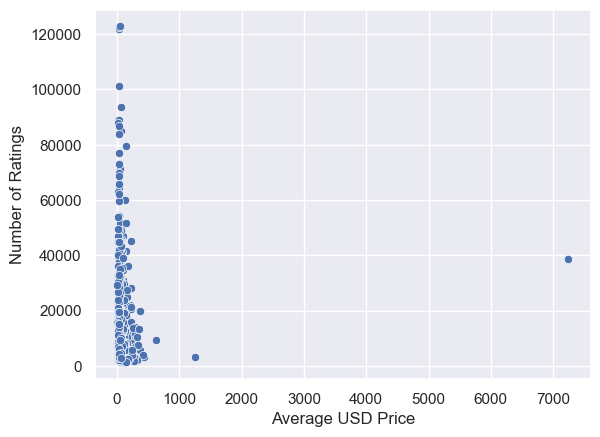

In [15]:
sns.scatterplot(data=boardGames, x = "Average USD Price", y = "Number of Ratings")

Create data frames without outliers for better visualization

In [181]:

boardgamesnew = boardGames.drop(index = [156, 51, 93, 200])
boardgamesplayers = boardGames.drop(index = [131, 164, 473, 823])
boardgamesyears = boardgamesnew.drop(index = [49, 441, 690, 816, 916, 949])

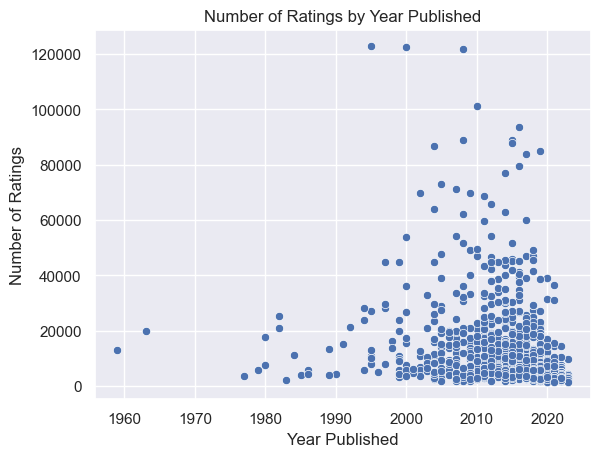

In [193]:
#sns.scatterplot(data=boardGames, x = "Bayes Rating", y = "Average USD Price")
#plt.savefig("EDAPlots/PriceByRating.png")

sns.scatterplot(data=boardgamesyears, x = "Year Published", y = "Number of Ratings")
plt.title("Number of Ratings by Year Published")
plt.savefig("EDAPlots/PopularitybyYear.png")

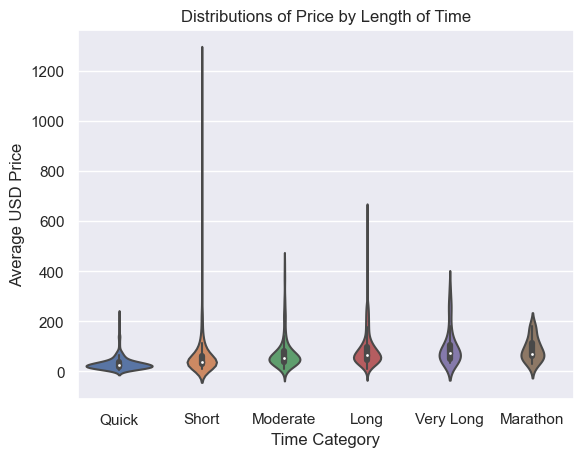

In [100]:
sns.violinplot(data=boardgamesnew, y = "Average USD Price", x = "Time Category")
plt.title("Distributions of Price by Length of Time")
plt.savefig("EDAPlots/PriceDistbyTime")

In [43]:
boardgamesnew.loc[boardgamesnew["Average USD Price"] > 1200]

,Title,Year Published,Min Players,Max Players,Playing Time,Age Minimum,Number of Accessories,Number of Ratings,Average Rating,Bayes Rating,Standard Deviation,Average USD Price,Age (Years),Time Category,AgeRating,GroupSize
588,Zombicide: 2nd Edition,2021,1,6,60,14,8,3117,8.01519,6.88293,1.36806,1245.0,2,Short,Teen,Large


In [6]:
boardGames["Age (Years)"].idxmax()
boardGames.loc[200]

Title                           Go
Year Published               -2200
Min Players                      2
Max Players                      2
Playing Time                   180
Age Minimum                      8
Number of Accessories            1
Number of Ratings            16872
Average Rating             7.64755
Bayes Rating               7.31349
Standard Deviation         1.90557
Average USD Price        27.225238
Age (Years)                   4223
Time Category                 Long
AgeRating                    Young
GroupSize                    Small
Name: 200, dtype: object

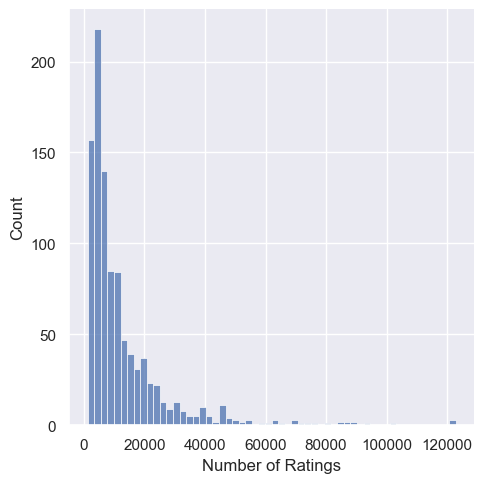

In [110]:
sns.displot(data = boardGames, x = "Number of Ratings")

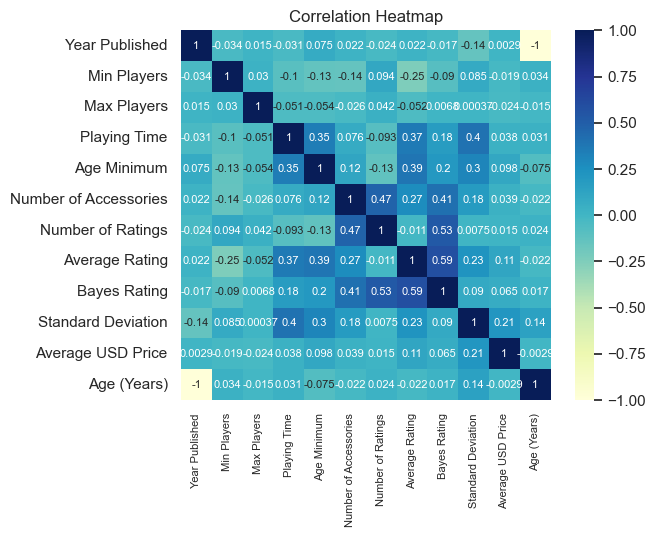

In [159]:
sns.set(font_scale =1.0) 
sns.heatmap(data = boardGames.corr(numeric_only=True), cmap="YlGnBu", annot = True, annot_kws = {'size': 8}, square = True).set(title="Correlation Heatmap")
plt.xticks(rotation=90, fontsize = 8)
plt.savefig("EDAPlots/correlationmatrix.png")

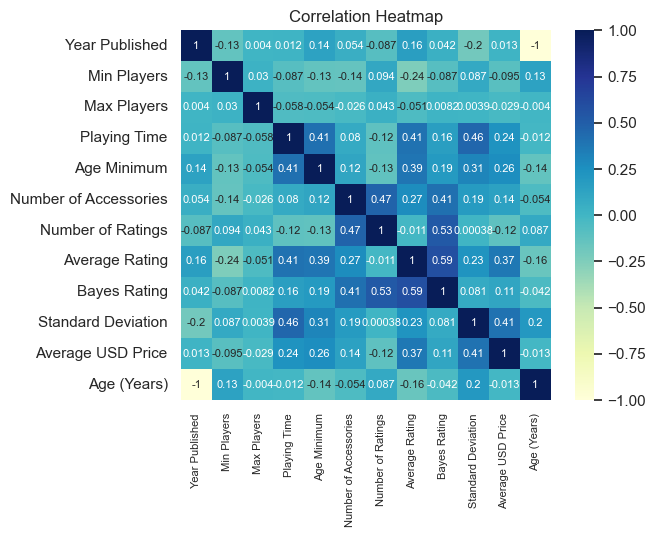

In [167]:
sns.set(font_scale =1.0) 
sns.heatmap(data = boardgamesnew.corr(numeric_only=True), cmap="YlGnBu", annot = True, annot_kws = {'size': 8}, square = True).set(title="Correlation Heatmap")
plt.xticks(rotation=90, fontsize = 8)
plt.savefig("EDAPlots/correlationmatrixnew.png")

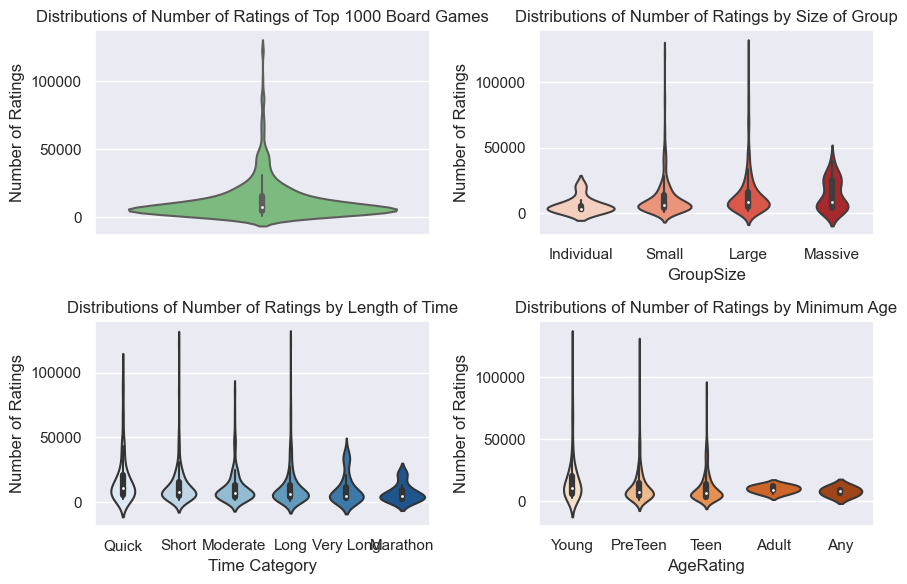

<Figure size 640x480 with 0 Axes>

In [190]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9, 6))
sns.violinplot(data=boardGames, y = "Number of Ratings", palette = "Greens", ax=axes[0, 0])
axes[0,0].set_title("Distributions of Number of Ratings of Top 1000 Board Games")
sns.violinplot(data=boardGames, y = "Number of Ratings", x = "Time Category", palette = "Blues", ax=axes[1, 0])
axes[1,0].set_title("Distributions of Number of Ratings by Length of Time")
sns.violinplot(data=boardGames, y = "Number of Ratings", x = "GroupSize", palette="Reds", ax =axes[0,1])
axes[0,1].set_title("Distributions of Number of Ratings by Size of Group")
sns.violinplot(data=boardGames, y = "Number of Ratings", x = "AgeRating", palette="Oranges", ax =axes[1,1])
axes[1,1].set_title("Distributions of Number of Ratings by Minimum Age")
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()
plt.savefig("EDAPlots/ViolinPlots.png")

In [ ]:
sns.violinplot(data=boardGames, y = "Bayes Rating", x = "GroupSize", palette="Reds")
plt.title("Distributions of Rating by Size of Group")
plt.savefig("EDAPlots/RatingDistbySize")

C:\Users\brade\AppData\Local\Temp\ipykernel_7104\523201452.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(labels=["Quick", "Short", "Moderate", "Long", "Very Long", "Marathon"], rotation = 45)


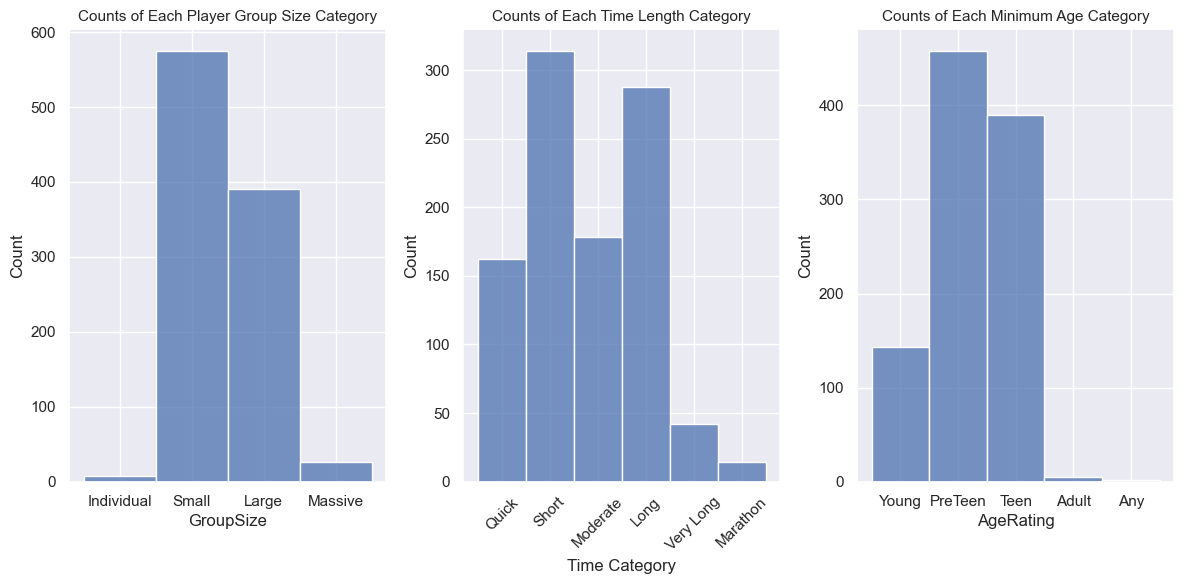

<Figure size 640x480 with 0 Axes>

In [146]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 6))
sns.histplot(data = boardGames, x = "GroupSize", ax = axes[0])
axes[0].set_title("Counts of Each Player Group Size Category", fontsize = 11)
#plt.savefig("EDAPlots/SizeCatCounts.png")
sns.histplot(data = boardGames, x = "Time Category", ax = axes[1])
axes[1].set_xticklabels(labels=["Quick", "Short", "Moderate", "Long", "Very Long", "Marathon"], rotation = 45)
axes[1].set_title("Counts of Each Time Length Category", fontsize = 11)
#plt.savefig("EDAPlots/TimeCatCounts.png")
sns.histplot(data = boardGames, x = "AgeRating", ax = axes[2])
axes[2].set_title("Counts of Each Minimum Age Category", fontsize = 11)
#plt.savefig("EDAPlots/AgeCatCounts.png")

#plt.savefig("EDAPlots/AgeCatCounts.png")
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()
plt.savefig("EDAPlots/CatHists.png")

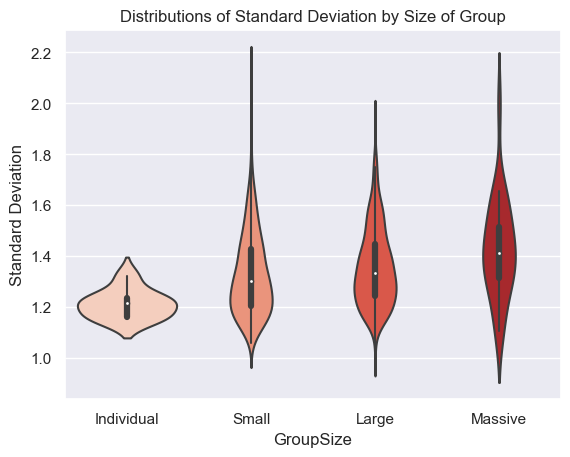

In [102]:
size_order = ["Individual", "Small", "Large", "Massive"]
sns.violinplot(data=boardgamesnew, y = "Standard Deviation", x = "GroupSize", palette="Reds", order = size_order)
plt.title("Distributions of Standard Deviation by Size of Group")
plt.savefig("EDAPlots/RatingVariancebySize")

In [65]:
boardgamesnew_filled = boardgamesnew
boardgamesnew_filled["Average USD Price"] = boardgamesnew["Average USD Price"].replace(np.nan, boardgamesnew["Average USD Price"].mean())

,Title,Year Published,Min Players,Max Players,Playing Time,Age Minimum,Number of Accessories,Number of Ratings,Average Rating,Bayes Rating,Standard Deviation,Average USD Price,Age (Years),Time Category,AgeRating,GroupSize
0,Brass: Birmingham,2018,2,4,120,14,15,41589,8.60841,8.42243,1.41849,144.334286,5,Long,Teen,Small
1,Pandemic Legacy: Season 1,2015,2,4,60,13,1,51789,8.53305,8.38673,1.60207,54.641786,8,Short,Teen,Small
2,Gloomhaven,2017,1,4,120,14,55,60064,8.60914,8.37477,1.74605,127.098214,6,Long,Teen,Small
3,Ark Nova,2021,1,4,150,14,13,36307,8.53318,8.31867,1.37819,63.212143,2,Long,Teen,Small
4,Twilight Imperium: Fourth Edition,2017,3,6,480,14,18,21980,8.61092,8.24098,1.61959,131.515517,6,Marathon,Teen,Large


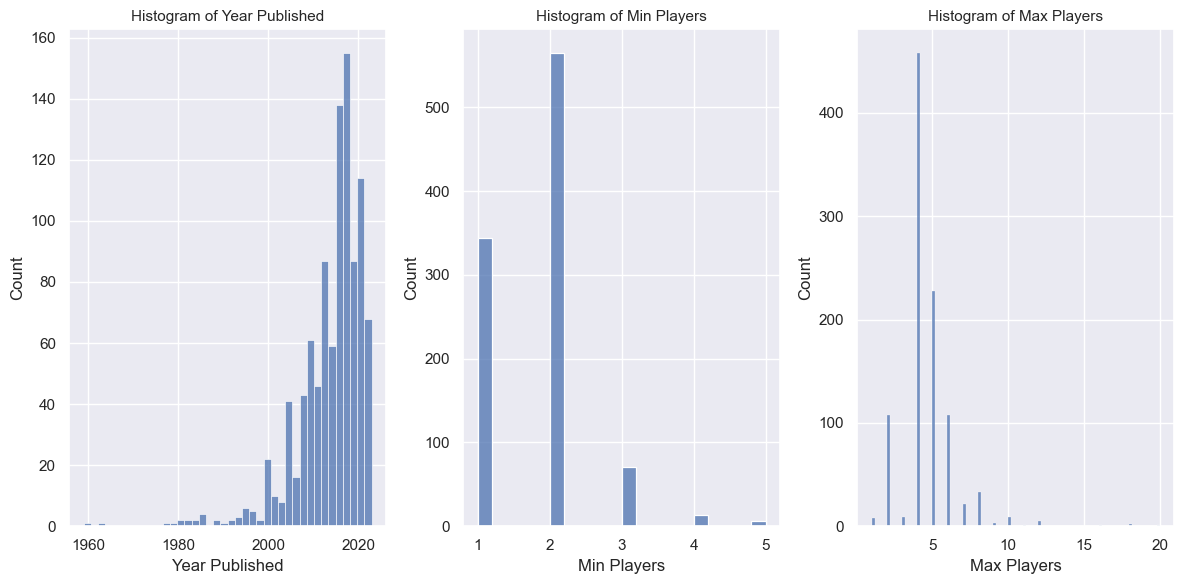

<Figure size 640x480 with 0 Axes>

In [182]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 6))

sns.histplot(data = boardgamesyears, x = "Year Published", ax = axes[0])
axes[0].set_title("Histogram of Year Published", fontsize = 11)
#plt.savefig("EDAPlots/SizeCatCounts.png")
sns.histplot(data = boardGames, x = "Min Players", ax = axes[1])
axes[1].set_title("Histogram of Min Players", fontsize = 11)
#plt.savefig("EDAPlots/TimeCatCounts.png")
sns.histplot(data = boardgamesplayers, x = "Max Players", ax = axes[2])
axes[2].set_title("Histogram of Max Players", fontsize = 11)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()
plt.savefig("EDAPlots/ContHistplots1.png")

In [185]:
boardGames["Age (Years)"].median()

8.0

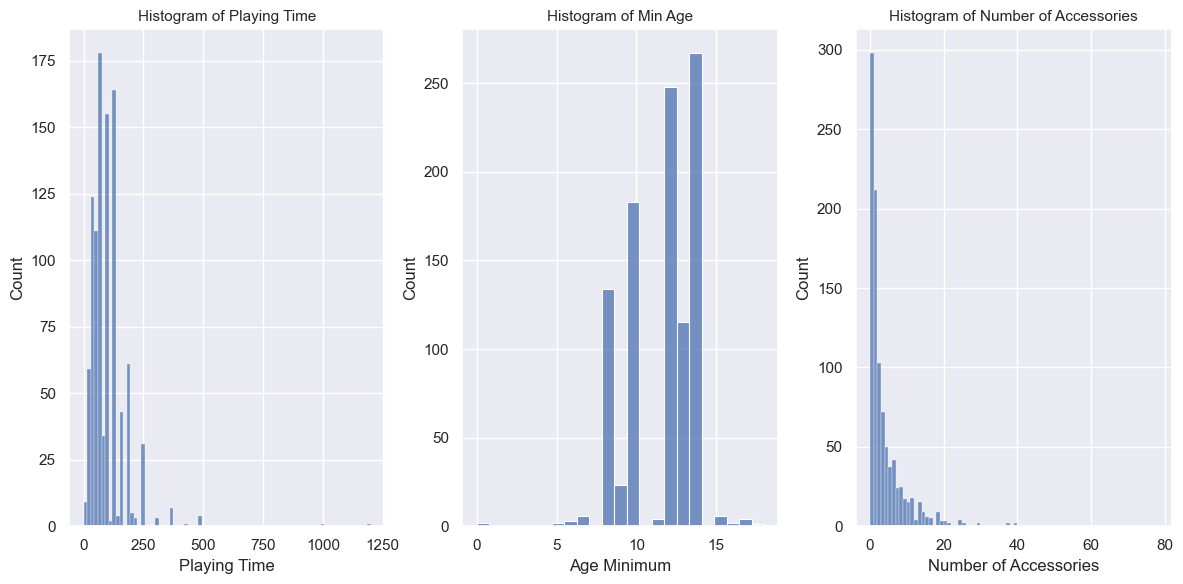

<Figure size 640x480 with 0 Axes>

In [151]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 6))

sns.histplot(data = boardGames, x = "Playing Time", ax = axes[0])
axes[0].set_title("Histogram of Playing Time", fontsize = 11)
#plt.savefig("EDAPlots/SizeCatCounts.png")
sns.histplot(data = boardGames, x = "Age Minimum", ax = axes[1])
axes[1].set_title("Histogram of Min Age", fontsize = 11)
#plt.savefig("EDAPlots/TimeCatCounts.png")
sns.histplot(data = boardGames, x = "Number of Accessories", ax = axes[2])
axes[2].set_title("Histogram of Number of Accessories", fontsize = 11)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()
plt.savefig("EDAPlots/ContHistplots3.png")

In [187]:
boardGames["Playing Time"].median()
boardGames["Age Minimum"].median()

12.0

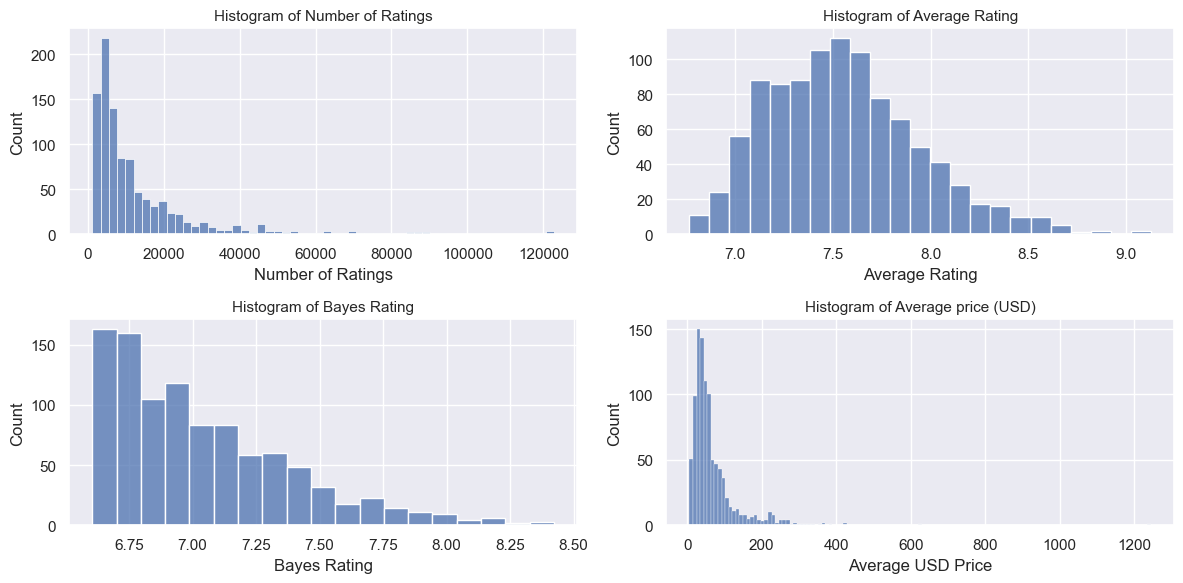

<Figure size 640x480 with 0 Axes>

In [177]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 6))

sns.histplot(data = boardGames, x = "Number of Ratings", ax = axes[0,0])
axes[0,0].set_title("Histogram of Number of Ratings", fontsize = 11)
#plt.savefig("EDAPlots/SizeCatCounts.png")
sns.histplot(data = boardGames, x = "Average Rating", ax = axes[0, 1])
axes[0,1].set_title("Histogram of Average Rating", fontsize = 11)
#plt.savefig("EDAPlots/TimeCatCounts.png")
sns.histplot(data = boardGames, x = "Bayes Rating", ax = axes[1, 0])
axes[1,0].set_title("Histogram of Bayes Rating", fontsize = 11)
sns.histplot(data = boardgamesnew, x = "Average USD Price", ax = axes[1, 1])
axes[1,1].set_title("Histogram of Average price (USD)", fontsize = 11)
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()
plt.savefig("EDAPlots/ContHistplots3.png")

In [76]:
X1 = boardgamesnew_filled.iloc[:, np.r_[2, 4:8, 11]]
Y = boardgamesnew.iloc[:, 9]
X = sm.add_constant(X1)
model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Bayes Rating   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                     109.2
Date:                Tue, 12 Dec 2023   Prob (F-statistic):          1.24e-105
Time:                        21:41:38   Log-Likelihood:                -126.60
No. Observations:                 999   AIC:                             267.2
Df Residuals:                     992   BIC:                             301.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     6.52

In [173]:
boardGames.loc[boardGames["Year Published"] < 1950].index

Int64Index([49, 200, 441, 690, 816, 916, 949], dtype='int64')

In [180]:
boardGames.loc[boardGames["Max Players"] > 80].index

Int64Index([131, 164, 473, 823], dtype='int64')